If we explore the data as outlined in [Comprehensive data exploration with Python](https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python), what score are we going to get?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
%matplotlib inline

In [2]:
df_train = pd.read_csv('./train.csv')

In [3]:
#missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [4]:
#dealing with missing data
df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index,1)
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
df_train.isnull().sum().max() #just checking that there's no missing data missing...

0

In [5]:
#deleting points
df_train.sort_values(by = 'GrLivArea', ascending = False)[:2]
df_train = df_train.drop(df_train[df_train['Id'] == 1299].index)
df_train = df_train.drop(df_train[df_train['Id'] == 524].index)

In [6]:
df_train["SalePrice"]

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1457, dtype: int64

In [7]:
#applying log transformation
df_train['SalePrice'] = np.log(df_train['SalePrice'])

In [8]:
df_train["SalePrice"]

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1457, dtype: float64

In [9]:
#data transformation
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])

In [10]:
#create column for new variable (one is enough because it's a binary categorical feature)
#if area>0 it gets 1, for area==0 it gets 0
df_train['HasBsmt'] = pd.Series(len(df_train['TotalBsmtSF']), index=df_train.index)
df_train['HasBsmt'] = 0 
df_train.loc[df_train['TotalBsmtSF']>0,'HasBsmt'] = 1

In [11]:
df_train.loc[df_train['HasBsmt'] == 1, 'TotalBsmtSF'] = np.log(df_train.loc[df_train['HasBsmt'] == 1, 'TotalBsmtSF'])

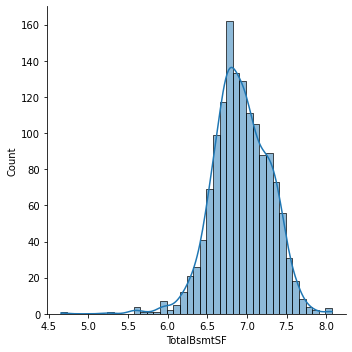

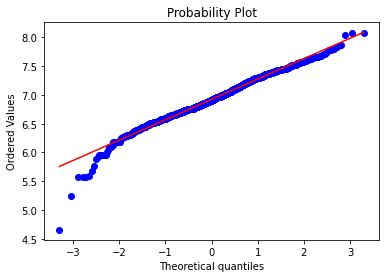

In [12]:


#histogram and normal probability plot
sns.displot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], kde=True);
fig = plt.figure()
res = stats.probplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)



In [13]:


#convert categorical variable into dummy
df_train = pd.get_dummies(df_train)



In [14]:
[column for column in df_train.columns if column.startswith("Garage")]

['GarageCars', 'GarageArea']

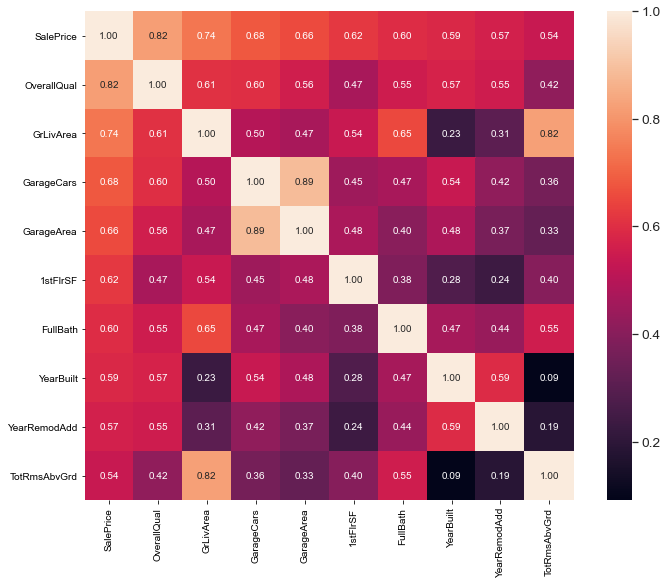

In [15]:
#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
#sns.heatmap(corrmat, vmax=.8, square=True);

#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [16]:
df_train

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,0,0,1,0,0,0,0,1,0
1,2,20,9600,6,8,1976,1976,978,0,284,...,0,0,0,1,0,0,0,0,1,0
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,0,0,1,0,0,0,0,1,0
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,0,0,1,1,0,0,0,0,0
4,5,60,14260,8,5,2000,2000,655,0,490,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,6,5,1999,2000,0,0,953,...,0,0,0,1,0,0,0,0,1,0
1456,1457,20,13175,6,6,1978,1988,790,163,589,...,0,0,0,1,0,0,0,0,1,0
1457,1458,70,9042,7,9,1941,2006,275,0,877,...,0,0,0,1,0,0,0,0,1,0
1458,1459,20,9717,5,6,1950,1996,49,1029,0,...,0,0,0,1,0,0,0,0,1,0


In [17]:
# Grab the most correlated variables
X_train, y_train = df_train.loc[:, ["OverallQual", "GrLivArea", "GarageCars", "TotalBsmtSF", "FullBath", "TotRmsAbvGrd", "YearBuilt", "YearRemodAdd"]], df_train["SalePrice"]

In [18]:
X_train

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
0,7,7.444249,2,6.752270,2,8,2003,2003
1,6,7.140453,2,7.140453,2,6,1976,1976
2,7,7.487734,2,6.824374,2,6,2001,2002
3,7,7.448334,3,6.628041,1,7,1915,1970
4,8,7.695303,3,7.043160,2,9,2000,2000
...,...,...,...,...,...,...,...,...
1455,6,7.406711,2,6.859615,2,7,1999,2000
1456,6,7.636752,2,7.340836,2,7,1978,1988
1457,7,7.757906,1,7.049255,2,9,1941,2006
1458,5,6.982863,1,6.982863,1,5,1950,1996


In [19]:
y_train

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1457, dtype: float64

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf = RandomForestRegressor(random_state=42)
rf_random = RandomizedSearchCV(
    estimator=rf, 
    param_distributions=random_grid, 
    n_iter=100, 
    cv=3, 
    verbose=2, 
    random_state=42,
    n_jobs=-1
)
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   16.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.9min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [21]:
rf_random.best_params_

{'n_estimators': 2000,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 100,
 'bootstrap': True}

In [28]:
df_test = pd.read_csv("./test.csv", index_col="Id")

In [25]:
df_test

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml


In [32]:
# Grab the most correlated variables
X_test = df_test.loc[:, ["OverallQual", "GrLivArea", "GarageCars", "TotalBsmtSF", "FullBath", "TotRmsAbvGrd", "YearBuilt", "YearRemodAdd"]]

In [35]:
X_test

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
Id,,,,,,,,
1461,5,896,1.0,882.0,1,5,1961,1961
1462,6,1329,1.0,1329.0,1,6,1958,1958
1463,5,1629,2.0,928.0,2,6,1997,1998
1464,6,1604,2.0,926.0,2,7,1998,1998
1465,8,1280,2.0,1280.0,2,5,1992,1992
...,...,...,...,...,...,...,...,...
2915,4,1092,0.0,546.0,1,5,1970,1970
2916,4,1092,1.0,546.0,1,6,1970,1970
2917,5,1224,2.0,1224.0,1,7,1960,1996


In [36]:
#missing data
total = X_test.isnull().sum().sort_values(ascending=False)
percent = (X_test.isnull().sum()/X_test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
TotalBsmtSF,1,0.000685
GarageCars,1,0.000685
YearRemodAdd,0,0.000000
YearBuilt,0,0.000000
TotRmsAbvGrd,0,0.000000
FullBath,0,0.000000
GrLivArea,0,0.000000
OverallQual,0,0.000000


In [46]:
X_test = X_test.fillna(0.0)

In [48]:
X_test.isnull().sum()

OverallQual     0
GrLivArea       0
GarageCars      0
TotalBsmtSF     0
FullBath        0
TotRmsAbvGrd    0
YearBuilt       0
YearRemodAdd    0
dtype: int64

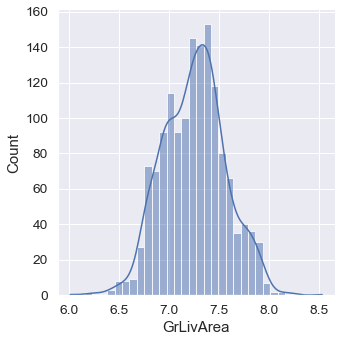

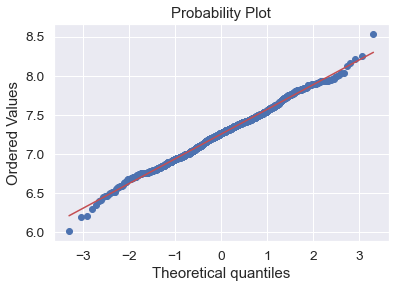

In [53]:
sns.displot(X_test['GrLivArea'], kde=True);
fig = plt.figure()
res = stats.probplot(X_test['GrLivArea'], plot=plt)


In [51]:
X_test["GrLivArea"] = np.log(X_test["GrLivArea"])

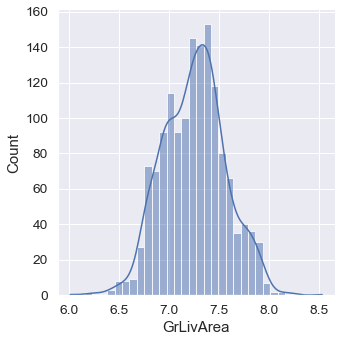

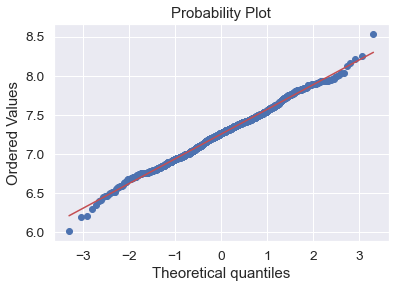

In [54]:
sns.displot(X_test['GrLivArea'], kde=True);
fig = plt.figure()
res = stats.probplot(X_test['GrLivArea'], plot=plt)


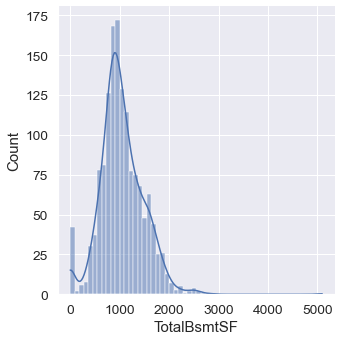

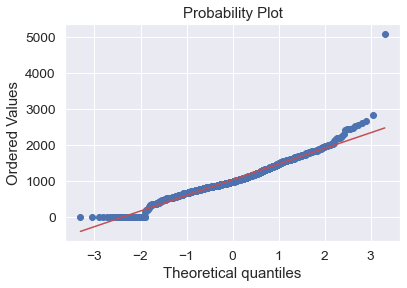

In [55]:
sns.displot(X_test['TotalBsmtSF'], kde=True);
fig = plt.figure()
res = stats.probplot(X_test['TotalBsmtSF'], plot=plt)

In [56]:
#create column for new variable (one is enough because it's a binary categorical feature)
#if area>0 it gets 1, for area==0 it gets 0
X_test['HasBsmt'] = pd.Series(len(X_test['TotalBsmtSF']), index=X_test.index)
X_test['HasBsmt'] = 0 
X_test.loc[X_test['TotalBsmtSF']>0,'HasBsmt'] = 1

In [58]:
X_test.loc[X_test['HasBsmt'] == 1, 'TotalBsmtSF'] = np.log(X_test.loc[X_test['HasBsmt'] == 1, 'TotalBsmtSF'])

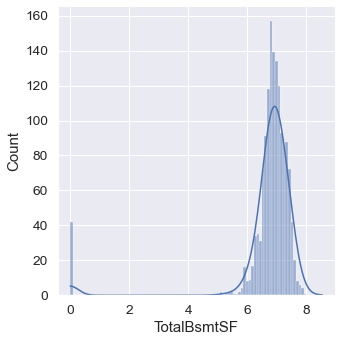

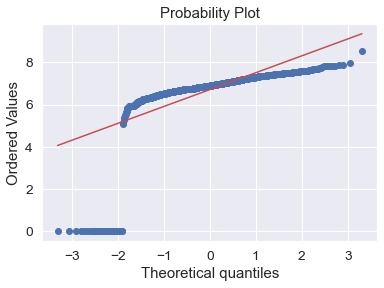

In [59]:
sns.displot(X_test['TotalBsmtSF'], kde=True);
fig = plt.figure()
res = stats.probplot(X_test['TotalBsmtSF'], plot=plt)

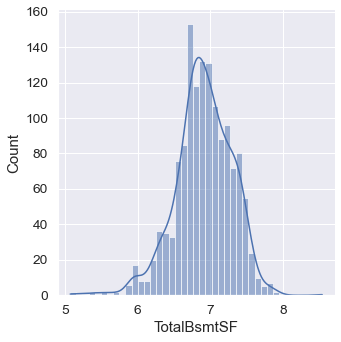

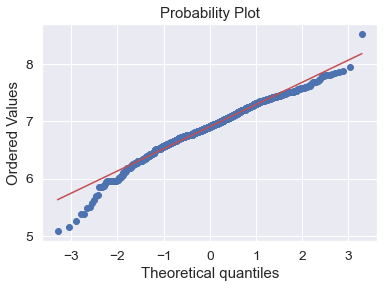

In [60]:
sns.displot(X_test[X_test['TotalBsmtSF']>0]['TotalBsmtSF'], kde=True);
fig = plt.figure()
res = stats.probplot(X_test[X_test['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

In [61]:
X_test

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,HasBsmt
Id,,,,,,,,,
1461,5,6.797940,1.0,6.782192,1,5,1961,1961,1
1462,6,7.192182,1.0,7.192182,1,6,1958,1958,1
1463,5,7.395722,2.0,6.833032,2,6,1997,1998,1
1464,6,7.380256,2.0,6.830874,2,7,1998,1998,1
1465,8,7.154615,2.0,7.154615,2,5,1992,1992,1
...,...,...,...,...,...,...,...,...,...
2915,4,6.995766,0.0,6.302619,1,5,1970,1970,1
2916,4,6.995766,1.0,6.302619,1,6,1970,1970,1
2917,5,7.109879,2.0,7.109879,1,7,1960,1996,1


In [66]:
X_test = X_test.drop("HasBsmt", axis="columns")

In [67]:
X_test

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
Id,,,,,,,,
1461,5,6.797940,1.0,6.782192,1,5,1961,1961
1462,6,7.192182,1.0,7.192182,1,6,1958,1958
1463,5,7.395722,2.0,6.833032,2,6,1997,1998
1464,6,7.380256,2.0,6.830874,2,7,1998,1998
1465,8,7.154615,2.0,7.154615,2,5,1992,1992
...,...,...,...,...,...,...,...,...
2915,4,6.995766,0.0,6.302619,1,5,1970,1970
2916,4,6.995766,1.0,6.302619,1,6,1970,1970
2917,5,7.109879,2.0,7.109879,1,7,1960,1996


In [70]:
predictions = rf_random.predict(X_test)

In [71]:
predictions

array([11.65104018, 11.88661385, 12.06522288, ..., 11.90536689,
       11.64491297, 12.40281149])

In [75]:
# Reverse previous log tranformation
predictions = np.exp(predictions)

In [77]:
# Make a DataFrame out of it
submission = pd.DataFrame(predictions, index=X_test.index, columns=["SalePrice"])

In [78]:
submission

,SalePrice
Id,
1461,114810.724977
1462,145308.427055
1463,173723.960264
1464,182624.335773
1465,195196.254097
...,...
2915,88718.171912
2916,85906.203119
2917,148059.114345


In [79]:
submission.to_csv("submission_03.csv")